In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NFHS_5_India_Districts_Factsheet_Data.csv")

In [ ]:
print(df.shape)
df.head()


(707, 109)


,District Names,State/UT,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ?160 mm of Hg and/or Diastolic ?100 mm of Hg) (%),Men age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%),Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%),Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,Nicobars,Andaman & Nicobar Islands,882,764,125,78.0,23.0,973,927,98.0,...,32.9,11.1,47.0,13.4,13.2,5.4,63.5,76.8,29.6,64.5
1,North & Middle Andaman,Andaman & Nicobar Islands,874,789,108,82.7,19.8,950,844,100.0,...,22.6,6.0,32.2,1.7,0.3,15.8,46.8,70.5,5.1,45.3
2,South Andaman,Andaman & Nicobar Islands,868,844,134,84.7,21.0,967,935,96.5,...,17.9,6.1,26.9,1.3,0.7,8.0,19.6,50.8,1.7,32.8
3,Srikakulam,Andhra Pradesh,874,780,100,60.0,20.7,1140,1163,95.0,...,14.4,5.5,22.9,1.0,0.2,3.8,7.1,21.3,0.6,28.3
4,Vizianagaram,Andhra Pradesh,902,853,134,56.0,20.6,1114,898,95.4,...,14.8,6.4,25.1,4.9,0.6,7.3,11.4,21.5,0.8,32.3


In [ ]:
for columns in df.columns:
  print(columns)

District Names
State/UT
Number of Households surveyed
Number of Women age 15-49 years interviewed
Number of Men age 15-54 years interviewed
Female population age 6 years and above who ever attended school (%)
Population below age 15 years (%)
 Sex ratio of the total population (females per 1,000 males)
Sex ratio at birth for children born in the last five years (females per 1,000 males)
Children under age 5 years whose birth was registered with the civil authority (%)
Deaths in the last 3 years registered with the civil authority (%)
Population living in households with electricity (%)
Population living in households with an improved drinking-water source1 (%)
Population living in households that use an improved sanitation facility2 (%)
Households using clean fuel for cooking3 (%)
Households using iodized salt (%)
Households with any usual member covered under a health insurance/financing scheme (%)
Children age 5 years who attended pre-primary school during the school year 2019-20 (%)

# Clustering by Alcohol Consumption

In [ ]:
alcohol = df[['Women age 15 years and above who consume alcohol (%)','Men age 15 years and above who consume alcohol (%)']]

In [ ]:
alcohol.rename(columns={'Women age 15 years and above who consume alcohol (%)':'Women Alcohol_%','Men age 15 years and above who consume alcohol (%)':'Men  Alcohol_%'})

,Women Alcohol_%,Men Alcohol_%
0,29.6,64.5
1,5.1,45.3
2,1.7,32.8
3,0.6,28.3
4,0.8,32.3
...,...,...
702,0.4,16.5
703,1.5,20.8
704,2.0,14.8
705,0.8,14.6


In [ ]:
alcohol['District'] = df['District Names']

<ipython-input-8-9a0ee0df7763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol['District'] = df['District Names']


In [ ]:
alcohol['District'].nunique()
alcohol['State/UT'] = df['State/UT']

<ipython-input-9-10f96b20a725>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol['State/UT'] = df['State/UT']


In [ ]:
alcohol

,Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%),District,State/UT
0,29.6,64.5,Nicobars,Andaman & Nicobar Islands
1,5.1,45.3,North & Middle Andaman,Andaman & Nicobar Islands
2,1.7,32.8,South Andaman,Andaman & Nicobar Islands
3,0.6,28.3,Srikakulam,Andhra Pradesh
4,0.8,32.3,Vizianagaram,Andhra Pradesh
...,...,...,...,...
702,0.4,16.5,South Twenty Four Pargana,West Bengal
703,1.5,20.8,Paschim Medinipur,West Bengal
704,2.0,14.8,Purba Medinipur,West Bengal
705,0.8,14.6,Paschim Barddhaman,West Bengal


In [ ]:
alcohol = alcohol.rename(columns={'Women age 15 years and above who consume alcohol (%)':'Women Alcohol_%','Men age 15 years and above who consume alcohol (%)':'Men  Alcohol_%'})

### Plot -1


In [ ]:
alcohol.columns

Index(['Women Alcohol_%', 'Men  Alcohol_%', 'District', 'State/UT'], dtype='object')

<ipython-input-13-f944bcdf7fb0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(alcohol[x] , bins = 70)
<ipython-input-13-f944bcdf7fb0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(alcohol[x] , bins = 70)


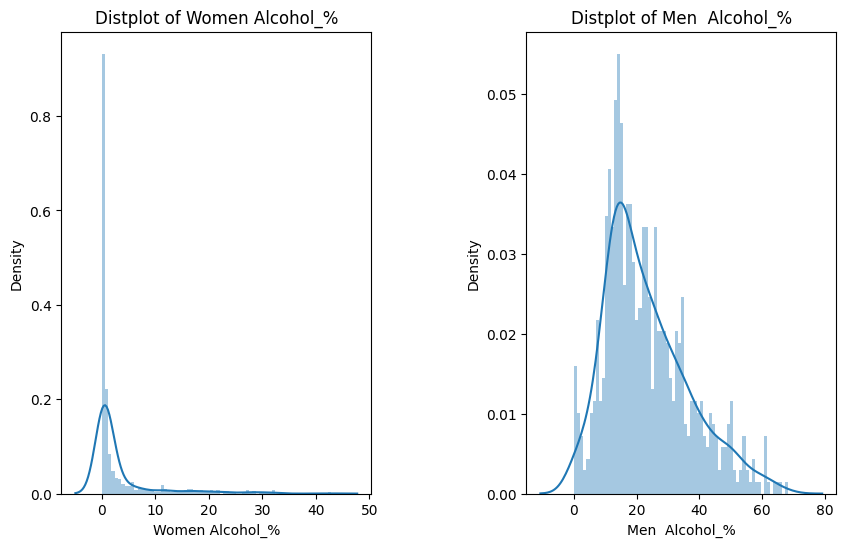

In [ ]:
plt.figure(1 , figsize = (10 , 6))
n= 0
for x in ['Women Alcohol_%', 'Men  Alcohol_%']:
  n = n+1
  plt.subplot(1 , 2 , n)
  plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
  sns.distplot(alcohol[x] , bins = 70)
  plt.title('Distplot of {}'.format(x))

plt.show()

In [ ]:
X = alcohol[['Women Alcohol_%', 'Men  Alcohol_%']]

In [ ]:
X

,Women Alcohol_%,Men Alcohol_%
0,29.6,64.5
1,5.1,45.3
2,1.7,32.8
3,0.6,28.3
4,0.8,32.3
...,...,...
702,0.4,16.5
703,1.5,20.8
704,2.0,14.8
705,0.8,14.6


In [ ]:
inertia = []  # WESS
for n in range(1 , 11):  # Number of CLusters to be tried
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


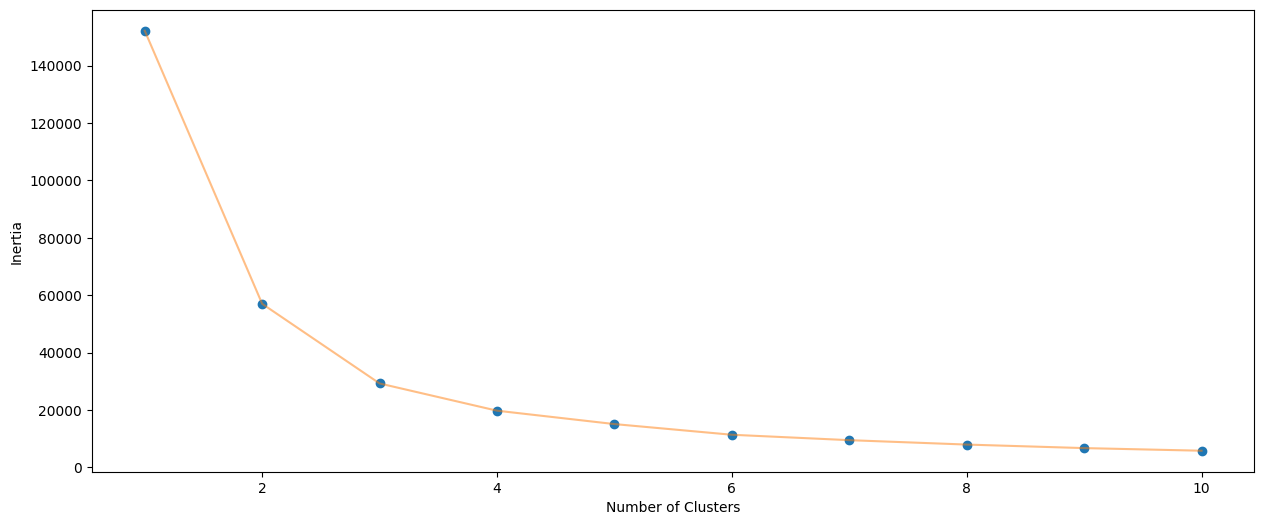

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
lenght = len(labels1)

In [ ]:
alcohol['Cluster'] = labels1


In [ ]:
alcohol

,Women Alcohol_%,Men Alcohol_%,District,State/UT,Cluster
0,29.6,64.5,Nicobars,Andaman & Nicobar Islands,3
1,5.1,45.3,North & Middle Andaman,Andaman & Nicobar Islands,1
2,1.7,32.8,South Andaman,Andaman & Nicobar Islands,1
3,0.6,28.3,Srikakulam,Andhra Pradesh,0
4,0.8,32.3,Vizianagaram,Andhra Pradesh,1
...,...,...,...,...,...
702,0.4,16.5,South Twenty Four Pargana,West Bengal,2
703,1.5,20.8,Paschim Medinipur,West Bengal,0
704,2.0,14.8,Purba Medinipur,West Bengal,2
705,0.8,14.6,Paschim Barddhaman,West Bengal,2


In [ ]:
cluste = alcohol.drop('Women Alcohol_%', axis = 1)


In [ ]:
cluste.columns

Index(['Men  Alcohol_%', 'District', 'State/UT', 'Cluster'], dtype='object')

In [ ]:
cluster = cluste.drop(['Men  Alcohol_%'], axis = 1 )

In [ ]:
cluster['Cluster'] = cluster['Cluster'].astype(int)

In [ ]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   District  707 non-null    object
 1   State/UT  707 non-null    object
 2   Cluster   707 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.7+ KB


In [ ]:
test = cluster[['District','State/UT','Cluster']]

In [ ]:
alcohol

,Women Alcohol_%,Men Alcohol_%,District,State/UT,Cluster
0,29.6,64.5,Nicobars,Andaman & Nicobar Islands,3
1,5.1,45.3,North & Middle Andaman,Andaman & Nicobar Islands,1
2,1.7,32.8,South Andaman,Andaman & Nicobar Islands,1
3,0.6,28.3,Srikakulam,Andhra Pradesh,0
4,0.8,32.3,Vizianagaram,Andhra Pradesh,1
...,...,...,...,...,...
702,0.4,16.5,South Twenty Four Pargana,West Bengal,2
703,1.5,20.8,Paschim Medinipur,West Bengal,0
704,2.0,14.8,Purba Medinipur,West Bengal,2
705,0.8,14.6,Paschim Barddhaman,West Bengal,2


Index(['District', 'State/UT', 'Cluster'], dtype='object')
Index(['District', 'STATE', 'REMARKS', 'State_LGD', 'DISTRICT_L', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


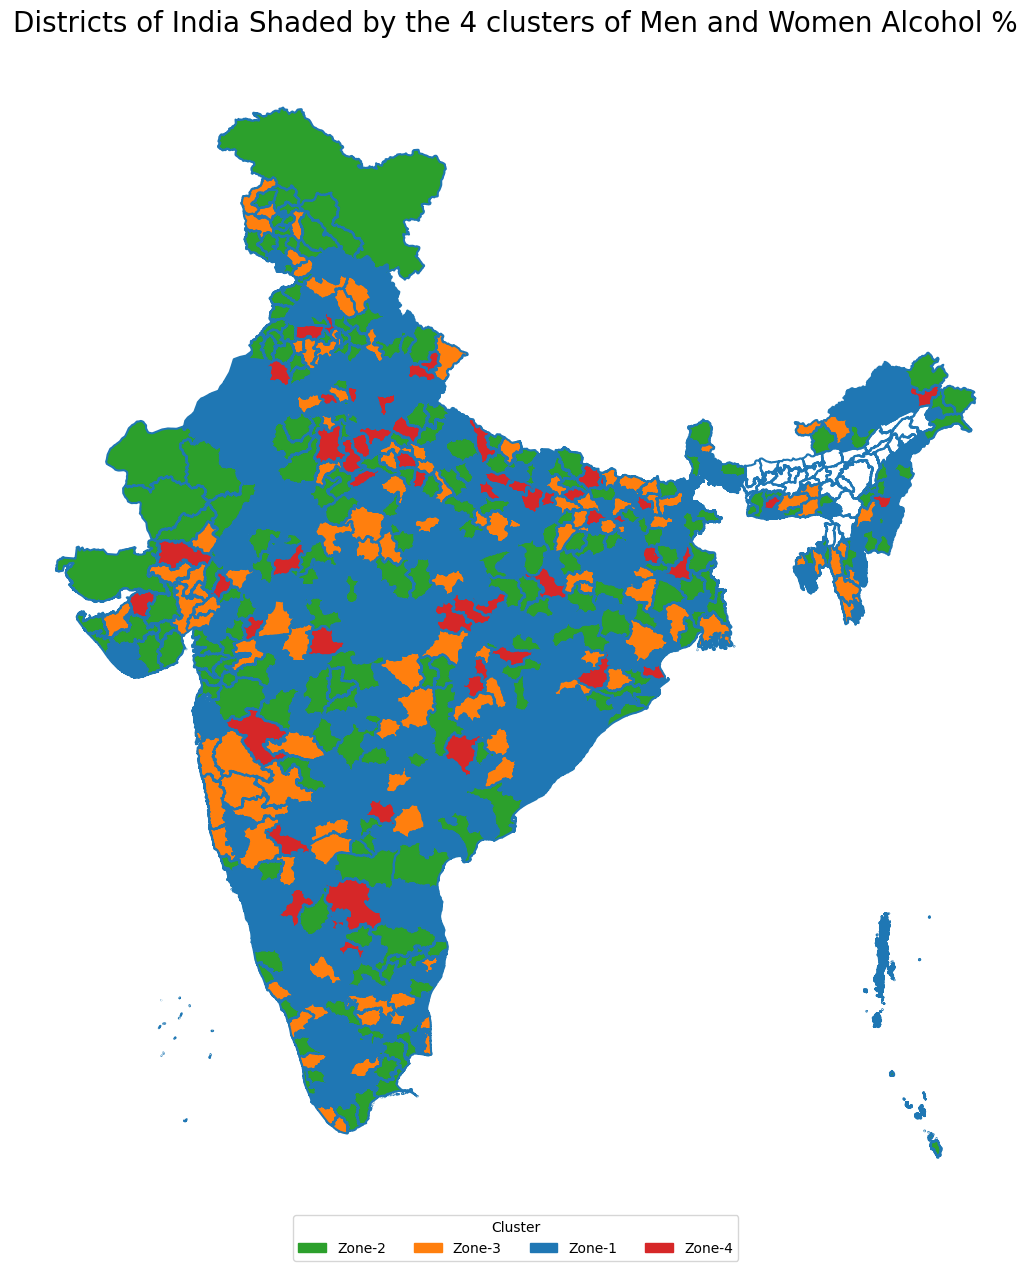

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


# Load the India shapefile
shapefile_path = "/content/drive/MyDrive/shapefile/DISTRICT_BOUNDARY.shp"
india_shapefile = gpd.read_file(shapefile_path)

# Inspect the column names and data in both DataFrames
print(test.columns)
print(india_shapefile.columns)

# Remove leading/trailing spaces and normalize case
test['District'] = test['District'].str.strip().str.upper()
india_shapefile['DISTRICT_L'] = india_shapefile['DISTRICT_L'].str.strip().str.upper()


# Merge the DataFrame with the shapefile GeoDataFrame
geo_cluster = india_shapefile.merge(test, how='left', left_on='DISTRICT_L', right_on='District')

# Check if the merge was successful

geo_cluster['State/UT'] = test['State/UT']
geo_cluster['District_y'] = test['District']
geo_cluster['Cluster'] = test['Cluster']

# Define a colormap with specific colors for each cluster
colors = ['#2ca02c', '#ff7f0e','#1f77b4', '#d62728']  # Customize your colors here
cmap = mcolors.ListedColormap(colors)
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

norm = mcolors.BoundaryNorm(boundaries=[0, 1, 2, 3, 4], ncolors=4)

# Plot the districts
geo_cluster.boundary.plot(ax=ax)
"""
# Plot the clusters
geo_cluster.plot(column='Cluster', ax=ax, legend=True,
                 legend_kwds={'label': "Cluster",
                              'orientation': "vertical"},
                 cmap=cmap)  # You can choose other colormaps as well
"""
geo_cluster.plot(column='Cluster', ax=ax,
                 legend= False,
                 cmap=cmap, norm = norm)
# Create custom legend
cluster_labels = ['Zone-2', 'Zone-3', 'Zone-1', 'Zone-4']
patches = [mpatches.Patch(color=colors[i], label=cluster_labels[i]) for i in range(len(cluster_labels))]

# Add the legend to the plot
ax.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4, title="Cluster")

# Set the title
ax.set_title('Districts of India Shaded by the 4 clusters of Men and Women Alcohol %', fontsize=20)

# Remove axes
ax.set_axis_off()

plt.show()


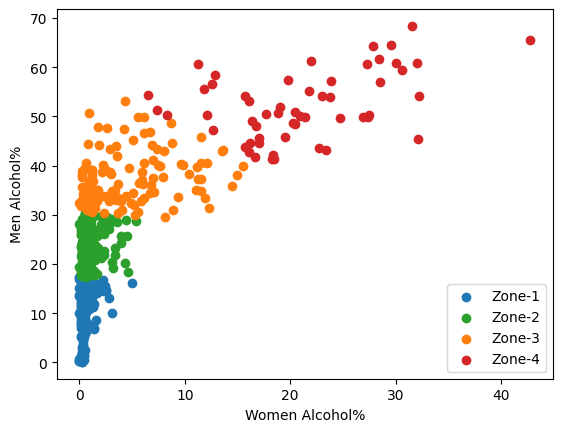

In [ ]:

# Assuming 'Cluster' is a column in your DataFrame `alcohol` that contains cluster labels
plt.scatter(alcohol[alcohol['Cluster'] == 2].iloc[:, 0], alcohol[alcohol['Cluster'] == 2].iloc[:, 1], color= colors[0], label='Zone-1')

plt.scatter(alcohol[alcohol['Cluster'] == 0].iloc[:, 0], alcohol[alcohol['Cluster'] == 0].iloc[:, 1], color = colors[2], label='Zone-2')


plt.scatter(alcohol[alcohol['Cluster'] == 1].iloc[:, 0], alcohol[alcohol['Cluster'] == 1].iloc[:, 1], color=colors[1], label='Zone-3')



plt.scatter(alcohol[alcohol['Cluster'] == 3].iloc[:, 0], alcohol[alcohol['Cluster'] == 3].iloc[:, 1], color= colors[3], label='Zone-4')








plt.xlabel('Women Alcohol%')  # Replace with your actual feature names
plt.ylabel('Men Alcohol%')
plt.legend()
plt.show()


#